In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.time_frequency import tfr_morlet
from mne.stats import permutation_cluster_test
from mne.datasets import sample

import os

In [3]:
content_root = '../'
subjects_folder_path = os.path.join(content_root, 'Source/Subjects')
subject_path = os.path.join(subjects_folder_path, 'Az_Mar_05')
info_path = os.path.join(subject_path, 'Info', 'ML_Subject05_P1_tsss_mc_trans_info.pkl')
resp_lock_lm_B1_epochs_path = os.path.join(subject_path, 'Epochs', 'RespCor_LM_B1_epochs.fif')
resp_lock_rm_B1_epochs_path = os.path.join(subject_path, 'Epochs', 'RespCor_RM_B1_epochs.fif')
resp_lock_li_B1_epochs_path = os.path.join(subject_path, 'Epochs', 'RespCor_LI_B1_epochs.fif')
resp_lock_ri_B1_epochs_path = os.path.join(subject_path, 'Epochs', 'RespCor_RI_B1_epochs.fif')

In [4]:
resp_lock_lm_B1_epochs = mne.read_epochs(resp_lock_lm_B1_epochs_path)
resp_lock_rm_B1_epochs = mne.read_epochs(resp_lock_rm_B1_epochs_path)
resp_lock_li_B1_epochs = mne.read_epochs(resp_lock_li_B1_epochs_path)
resp_lock_ri_B1_epochs = mne.read_epochs(resp_lock_ri_B1_epochs_path)

Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_LM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_25507/3748543114.py:1: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_LM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_lm_B1_epochs = mne.read_epochs(resp_lock_lm_B1_epochs_path)


Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_RM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_LI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_25507/3748543114.py:2: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_RM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_rm_B1_epochs = mne.read_epochs(resp_lock_rm_B1_epochs_path)
/tmp/ipykernel_25507/3748543114.py:3: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_LI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_li_B1_epochs = mne.read_epochs(resp_lock_li_B1_epochs_path)


Not setting metadata
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_RI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_25507/3748543114.py:4: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_RI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_ri_B1_epochs = mne.read_epochs(resp_lock_ri_B1_epochs_path)


In [5]:
# resp_lock_lm_B1_epochs.pick_channels(['MEG0113'])
# resp_lock_rm_B1_epochs.pick_channels(['MEG0113'])

In [6]:
freqs = np.logspace(*np.log10([5, 70]), num=7)
n_cycles = freqs / 2.

tfr_epochs_1 = tfr_morlet(
    resp_lock_lm_B1_epochs,
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
    n_jobs=1
)

tfr_epochs_2 = tfr_morlet(
    resp_lock_rm_B1_epochs,
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
    n_jobs=1
)

tfr_epochs_1.apply_baseline(mode='ratio', baseline=(None, None))
tfr_epochs_2.apply_baseline(mode='ratio', baseline=(None, None))

Not setting metadata
Not setting metadata
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)


<EpochsTFR | time : [-0.500000, 0.500000], freq : [5.000000, 70.000000], epochs : 30, channels : 204, ~168.9 MB>

No baseline correction applied


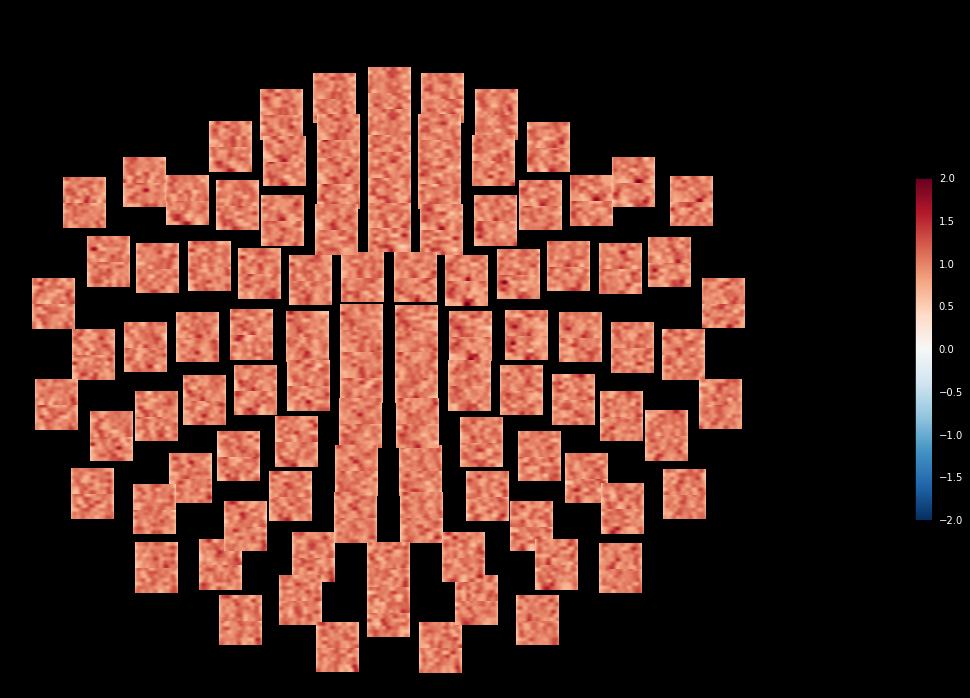

No baseline correction applied


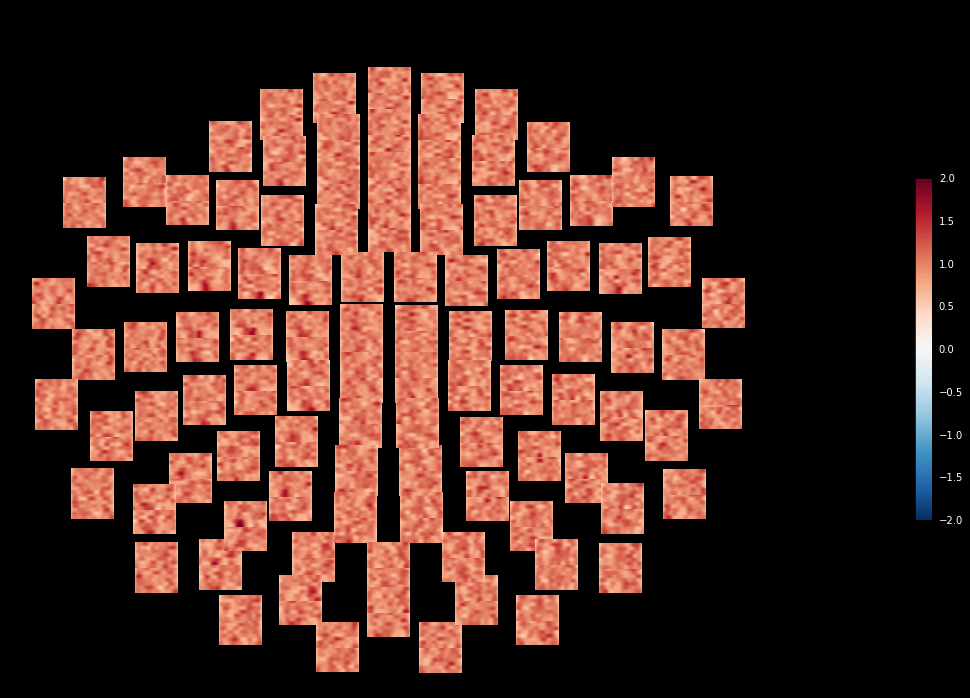

In [7]:
plt.rcParams["figure.figsize"] = (15, 10)
tfr_epochs_1.average().plot_topo(
    vmin=-2,
    vmax=2
)
plt.show()
tfr_epochs_2.average().plot_topo(
    vmin=-2,
    vmax=2
)
plt.show()

In [8]:
print('n_epochs, n_channels, n_freqs, n_times')
print(tfr_epochs_1.data.shape)

n_epochs, n_channels, n_freqs, n_times
(30, 204, 7, 501)


In [9]:
sensor_adjacency, ch_names = mne.channels.find_ch_adjacency(
    tfr_epochs_1.info, 'grad')
use_idx = [ch_names.index(ch_name.replace(' ', ''))
           for ch_name in tfr_epochs_1.ch_names]
sensor_adjacency = sensor_adjacency[use_idx][:, use_idx]
assert sensor_adjacency.shape == \
    (len(tfr_epochs_1.ch_names), len(tfr_epochs_1.ch_names))
assert tfr_epochs_1.data.data.shape == (
    len(resp_lock_lm_B1_epochs), len(tfr_epochs_1.ch_names),
    len(tfr_epochs_1.freqs), len(tfr_epochs_1.times))
adjacency = mne.stats.combine_adjacency(
    sensor_adjacency, len(tfr_epochs_1.freqs), len(tfr_epochs_1.times)
)

# our adjacency is square with each dim matching the data size
assert adjacency.shape[0] == adjacency.shape[1] == \
    len(tfr_epochs_1.ch_names) * len(tfr_epochs_1.freqs) * len(tfr_epochs_1.times)

Reading adjacency matrix for neuromag306planar.


In [10]:
epochs_power_1 = tfr_epochs_1.data
epochs_power_2 = tfr_epochs_2.data

In [11]:
threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = \
    permutation_cluster_test([epochs_power_1, epochs_power_2], out_type='mask',
                             n_permutations=100, threshold=threshold, tail=0, adjacency=adjacency)

stat_fun(H1): min=0.000000 max=22.612411
Running initial clustering
Found 289 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [10]:
print(cluster_p_values)

[1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.09  1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    0.995 1.    1.    1.    1.
 1.    1.    0.005 1.    1.    1.    1.    0.01  1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    0.995 1.    1.    1.    1.    1.    1.    1.    1.
 0.92  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1

In [12]:
print('channels, freqs, times')
print(T_obs.shape)
print('clusters, channels, freqs, times')
print(np.asarray(clusters).shape)
print('clusters')
print(cluster_p_values.shape)


channels, freqs, times
(204, 7, 501)
clusters, channels, freqs, times
(289, 204, 7, 501)
clusters
(289,)


No baseline correction applied


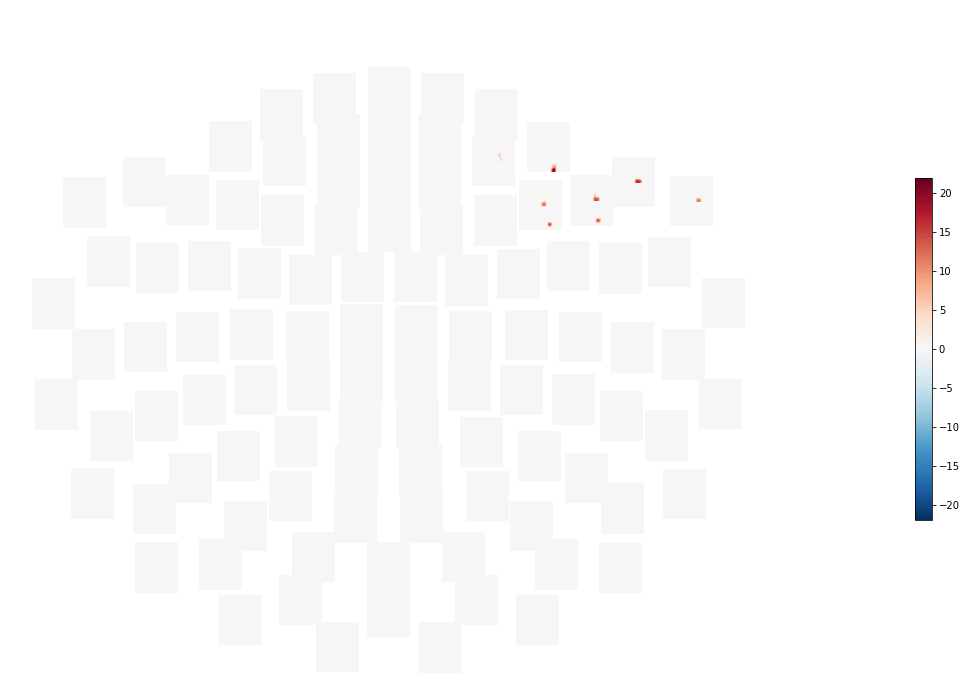

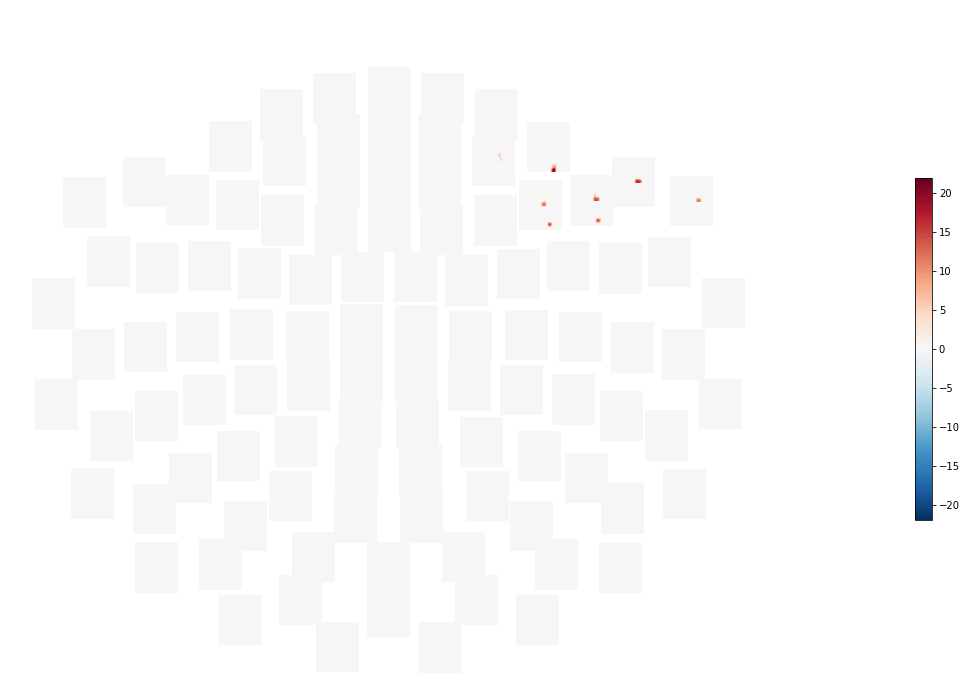

In [15]:
from mne.time_frequency import AverageTFR

times = 1e3 * resp_lock_rm_B1_epochs.times  # change unit to ms

evoked_condition_1 = resp_lock_lm_B1_epochs.average()
evoked_condition_2 = resp_lock_rm_B1_epochs.average()

# Create new stats image with only significant clusters
T_obs_plot = np.nan * np.ones_like(T_obs)

for c, p_val in zip(clusters, cluster_p_values):
    if p_val <= .05:
        T_obs_plot[c] = T_obs[c]

T_obs_sup = T_obs_plot.copy()

for i in range(T_obs_sup.shape[0]):
    for j in range(T_obs_sup.shape[1]):
        for k in range(T_obs_sup.shape[2]):
            if np.isnan(T_obs_sup[i, j, k]):
                T_obs_sup[i, j, k] = 0.

perm_common = AverageTFR(
    resp_lock_lm_B1_epochs.info,
    T_obs_sup,
    tfr_epochs_1.times,
    tfr_epochs_1.freqs,
    nave=1
)

perm_common.plot_topo(
    fig_facecolor='w',
    font_color='black',
)


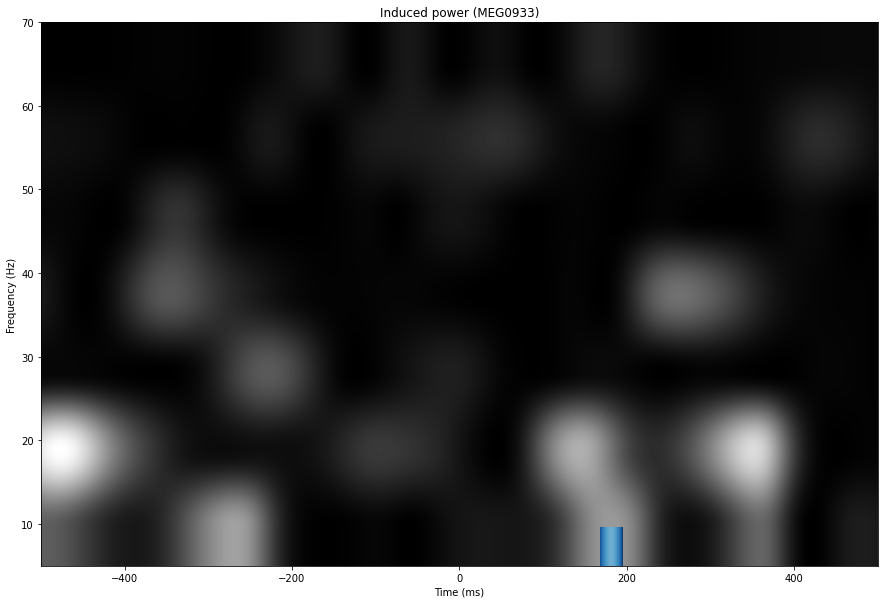

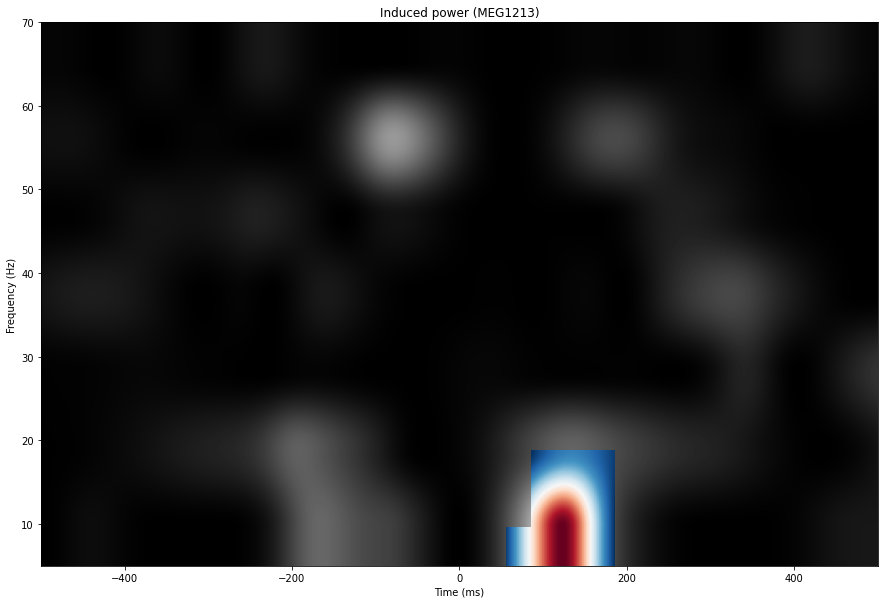

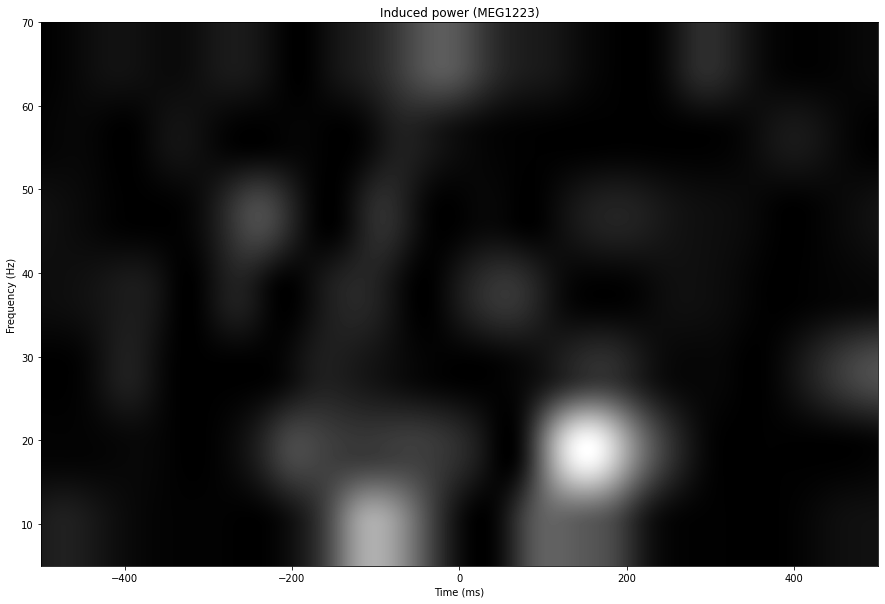

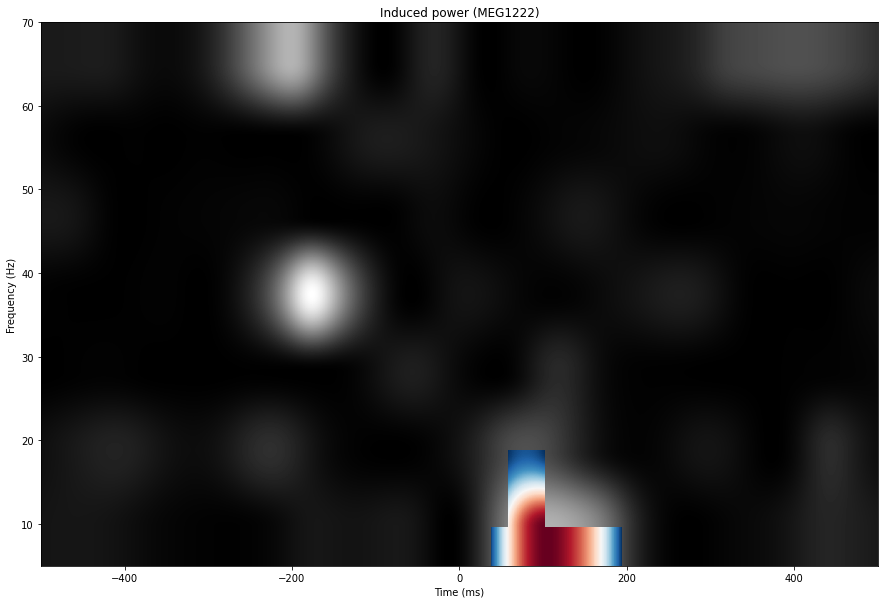

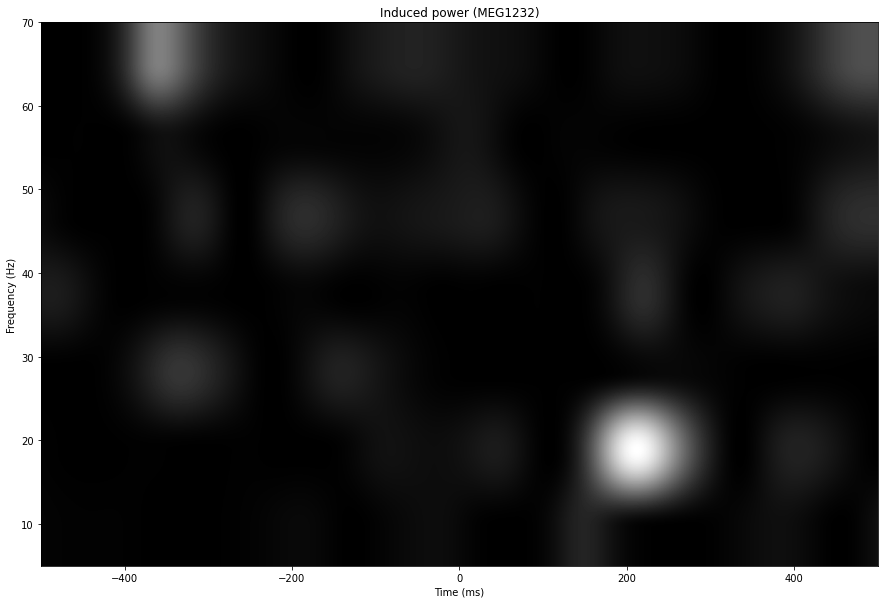

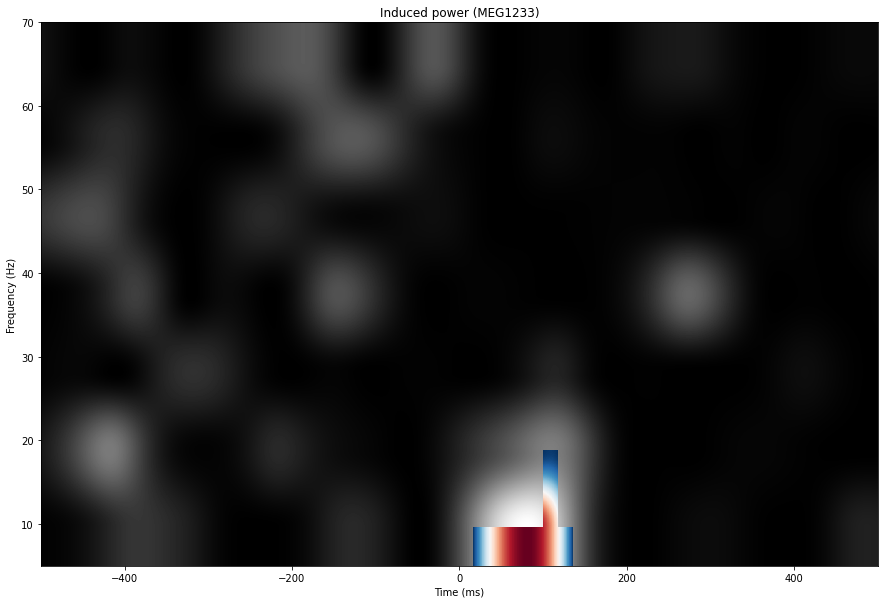

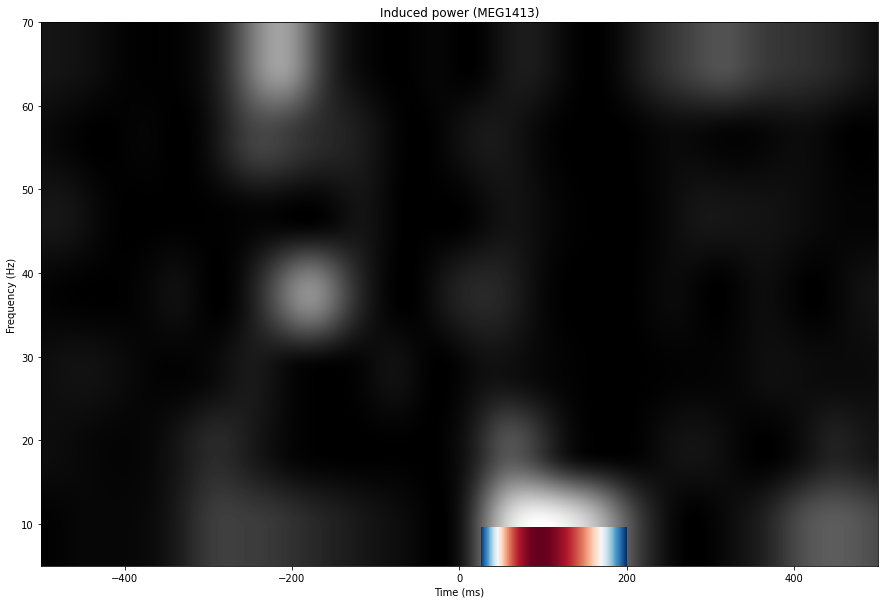

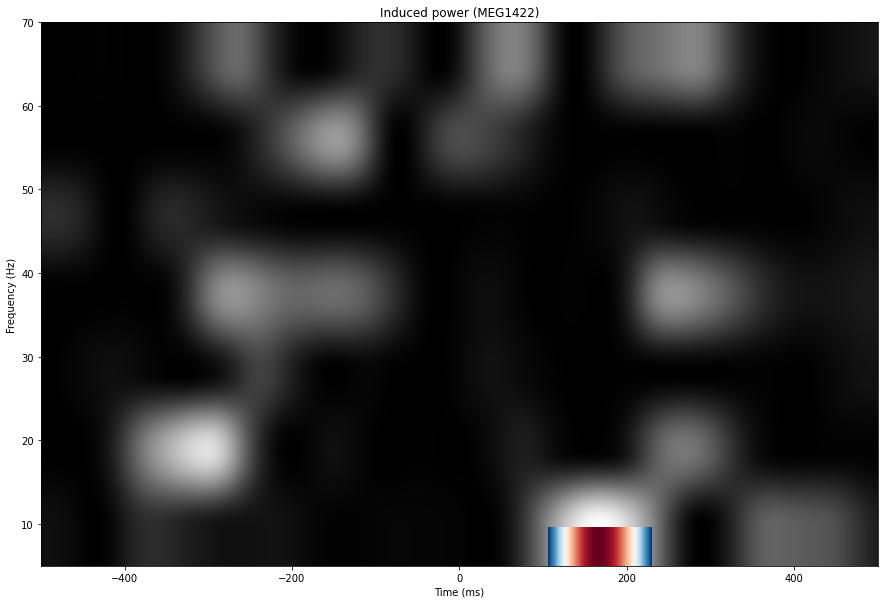

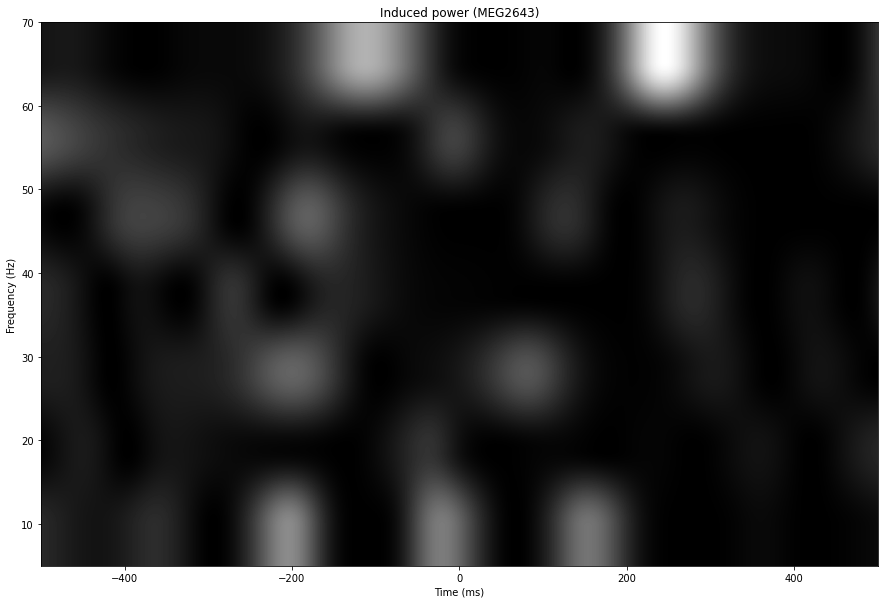

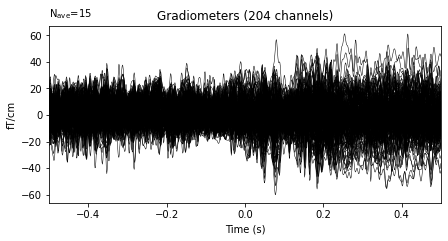

In [16]:
for i, ch_name in enumerate(resp_lock_lm_B1_epochs.ch_names):

    plt.imshow(T_obs[i, :, :],
               extent=[times[0], times[-1], freqs[0], freqs[-1]],
               aspect='auto', origin='lower', cmap='gray')
    plt.xlabel('Time (ms)')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'Induced power ({ch_name})')
    if not np.all(np.isnan(T_obs_plot[i, :, :])):
        plt.imshow(T_obs_plot[i, :, :],
                   extent=[times[0], times[-1], freqs[0], freqs[-1]],
                   aspect='auto', origin='lower', cmap='RdBu_r')
        plt.show()

evoked_contrast = mne.combine_evoked([evoked_condition_1, evoked_condition_2],
                                     weights=[1, -1])
evoked_contrast.plot(time_unit='s')

plt.show()
